In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Nha_ver2.csv')
data=data.drop(columns=['Unnamed: 0'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Quận             10023 non-null  object 
 1   Huyện            10023 non-null  object 
 2   Loại hình nhà ở  10023 non-null  object 
 3   Giấy tờ pháp lý  10023 non-null  object 
 4   Số tầng          10023 non-null  int64  
 5   Số phòng ngủ     10023 non-null  int64  
 6   Diện tích        10023 non-null  float64
 7   Dài              10023 non-null  float64
 8   Rộng             10023 non-null  float64
 9   Triệu đồng       10023 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 783.2+ KB


In [3]:
data.head(10)

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
0,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,10.0,4.0,2600.00
1,Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4,52.0,12.0,4.2,4850.04
2,Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3,32.0,6.6,4.5,1950.08
3,Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2,42.0,11.0,4.0,1249.92
4,Huyện Thanh Trì,Xã Tam Hiệp,"Nhà ngõ, hẻm",Đã có sổ,4,4,43.0,11.0,4.0,2150.00
5,Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,4,4,38.0,10.0,3.0,2599.96
6,Quận Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,11,70.0,17.0,4.0,8000.30
7,Quận Hà Đông,Phường Vạn Phúc,"Nhà ngõ, hẻm",Đã có sổ,5,4,30.0,9.0,3.4,2480.10
8,Quận Hai Bà Trưng,Phường Thanh Lương,"Nhà ngõ, hẻm",Đã có sổ,4,2,18.0,6.0,3.2,1900.08
9,Quận Ba Đình,Phường Ngọc Hà,"Nhà ngõ, hẻm",Đã có sổ,5,5,33.0,11.0,3.0,4499.88


In [4]:
target_name=data.columns[-1:]
print(target_name)

Index(['Triệu đồng'], dtype='object')


Hàm sắp xếp dictionary

In [5]:
import math
import pandas as pd
def create_rank_feature(x):
    temp_dict={}
    for i in range(len(x)):
        min=math.inf
        flat=0
        temp_key=None
        for key in x.keys():
            if key not in temp_dict.keys() and x[key] < min:
                min=x[key]
                temp_key=key
                flat=1
        temp_dict[temp_key]=[i,min]
    return temp_dict
test={'Quận đống đa':200,'Quận tân bình':100}
print(create_rank_feature(test))


{'Quận tân bình': [0, 100], 'Quận đống đa': [1, 200]}


Chuyển chuỗi quận, huyện, loại hình, giấy tờ sang số bằng phương pháp xếp hạng ước tính giá nhà trung bình ứng với từng giá trị đặc trưng

In [6]:
quan={}
huyen={}
loaihinh={}
giayto={}
for i in range(len(data)):
    a=str(data.loc[i,'Quận'])
    b=str(data.loc[i,'Huyện'])
    c=str(data.loc[i,'Loại hình nhà ở'])
    d=str(data.loc[i,'Giấy tờ pháp lý'])
    if a not in quan.keys():
        quan[a]=[1,float(data.loc[i,target_name])]
    else:
        quan[a][0]+=1
        quan[a][1]+=float(data.loc[i,target_name])

    if b not in huyen.keys():
        huyen[b]=[1,float(data.loc[i,target_name])]
    else:
        huyen[b][0]+=1
        huyen[b][1]+=float(data.loc[i,target_name])
    if c not in loaihinh.keys():
        loaihinh[c]=[1,float(data.loc[i,target_name])]
    else:
        loaihinh[c][0]+=1
        loaihinh[c][1]+=float(data.loc[i,target_name])
    if d not in giayto.keys():
        giayto[d]=[1,float(data.loc[i,target_name])]
    else:
        giayto[d][0]+=1
        giayto[d][1]+=float(data.loc[i,target_name])
print(quan)
print(huyen)
print(loaihinh)
print(giayto)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8344\4094582817.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  quan[a]=[1,float(data.loc[i,target_name])]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8344\4094582817.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  huyen[b]=[1,float(data.loc[i,target_name])]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8344\4094582817.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  loaihinh[c]=[1,float(data.loc[i,target_name])]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8344\4094582817.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  giayto[d]=[1,float

{'Quận Hai Bà Trưng': [916, 3356383.5380000025], 'Quận Long Biên': [660, 2373071.7349999994], 'Quận Nam Từ Liêm': [478, 1770661.9510000001], 'Huyện Thanh Trì': [180, 451059.35000000015], 'Quận Thanh Xuân': [1294, 5182776.041999997], 'Quận Đống Đa': [1387, 5943164.247999998], 'Quận Hà Đông': [1429, 4092201.8249999993], 'Quận Ba Đình': [616, 3103567.8160000006], 'Quận Hoàng Mai': [1033, 3090281.8839999964], 'Quận Bắc Từ Liêm': [231, 800299.53], 'Quận Tây Hồ': [474, 2501028.180000003], 'Quận Cầu Giấy': [1005, 5899658.4969999995], 'Huyện Hoài Đức': [132, 232081.38000000003], 'Huyện Gia Lâm': [46, 197940.17500000002], 'Quận Hoàn Kiếm': [79, 683749.35], 'Huyện Chương Mỹ': [4, 16499.34], 'Huyện Đông Anh': [14, 35301.405], 'Huyện Mê Linh': [3, 7900.4], 'Huyện Thường Tín': [5, 13800.239999999998], 'Huyện Thanh Oai': [13, 19317.86], 'Huyện Đan Phượng': [7, 25651.019999999997], 'Thị xã Sơn Tây': [6, 8164.5599999999995], 'Huyện Phúc Thọ': [1, 1625.0], 'Huyện Quốc Oai': [4, 17010.96], 'Huyện Thạch 

In [7]:
count_arr={}
for column in data.columns:
    print(column,len(data[column].unique()))
    count_arr[column]=round(1/len(data[column].unique()),4)
print(count_arr)

Quận 26
Huyện 237
Loại hình nhà ở 4
Giấy tờ pháp lý 4
Số tầng 9
Số phòng ngủ 11
Diện tích 177
Dài 241
Rộng 152
Triệu đồng 2830
{'Quận': 0.0385, 'Huyện': 0.0042, 'Loại hình nhà ở': 0.25, 'Giấy tờ pháp lý': 0.25, 'Số tầng': 0.1111, 'Số phòng ngủ': 0.0909, 'Diện tích': 0.0056, 'Dài': 0.0041, 'Rộng': 0.0066, 'Triệu đồng': 0.0004}


In [8]:
for i in quan.keys():
    quan[i]=quan[i][1]/quan[i][0]
for i in huyen.keys():
    huyen[i]=huyen[i][1]/huyen[i][0]
print(quan)
print(huyen)

{'Quận Hai Bà Trưng': 3664.1741681222734, 'Quận Long Biên': 3595.563234848484, 'Quận Nam Từ Liêm': 3704.3137050209207, 'Huyện Thanh Trì': 2505.885277777779, 'Quận Thanh Xuân': 4005.23650850077, 'Quận Đống Đa': 4284.905730353279, 'Quận Hà Đông': 2863.682172848145, 'Quận Ba Đình': 5038.259441558443, 'Quận Hoàng Mai': 2991.5603910938976, 'Quận Bắc Từ Liêm': 3464.50012987013, 'Quận Tây Hồ': 5276.430759493677, 'Quận Cầu Giấy': 5870.3069621890545, 'Huyện Hoài Đức': 1758.192272727273, 'Huyện Gia Lâm': 4303.047282608696, 'Quận Hoàn Kiếm': 8655.055063291138, 'Huyện Chương Mỹ': 4124.835, 'Huyện Đông Anh': 2521.5289285714284, 'Huyện Mê Linh': 2633.4666666666667, 'Huyện Thường Tín': 2760.048, 'Huyện Thanh Oai': 1485.9892307692307, 'Huyện Đan Phượng': 3664.431428571428, 'Thị xã Sơn Tây': 1360.76, 'Huyện Phúc Thọ': 1625.0, 'Huyện Quốc Oai': 4252.74, 'Huyện Thạch Thất': 1150.0, 'Huyện Sóc Sơn': 2635.2760000000003}
{'Phường Minh Khai': 3485.503409836067, 'Phường Bồ Đề': 4195.409433962263, 'Phường Tây 

In [9]:
for i in giayto.keys():
    giayto[i]=giayto[i][1]/giayto[i][0]
for i in loaihinh.keys():
    loaihinh[i]=loaihinh[i][1]/loaihinh[i][0]
print(giayto)
print(loaihinh)

{'Đã có sổ': 3987.8613667788163, 'Đang chờ sổ': 2967.302463768117, 'Giấy tờ khác': 2881.560163934427, 'Không rõ': 4047.060488372092}
{'Nhà ngõ, hẻm': 3575.2019064039287, 'Nhà mặt phố, mặt tiền': 5239.095312788903, 'Nhà biệt thự': 6752.324938271608, 'Nhà phố liền kề': 5377.0756797153035}


In [10]:
giayto={'Giấy tờ khác': 0.25, 'Đang chờ sổ': 0.5, 'Không rõ': 0.75, 'Đã có sổ': 1.0}

In [11]:
quan=create_rank_feature(quan)
huyen=create_rank_feature(huyen)
loaihinh=create_rank_feature(loaihinh)
print(quan)
print(huyen)
print(loaihinh)

{'Huyện Thạch Thất': [0, 1150.0], 'Thị xã Sơn Tây': [1, 1360.76], 'Huyện Thanh Oai': [2, 1485.9892307692307], 'Huyện Phúc Thọ': [3, 1625.0], 'Huyện Hoài Đức': [4, 1758.192272727273], 'Huyện Thanh Trì': [5, 2505.885277777779], 'Huyện Đông Anh': [6, 2521.5289285714284], 'Huyện Mê Linh': [7, 2633.4666666666667], 'Huyện Sóc Sơn': [8, 2635.2760000000003], 'Huyện Thường Tín': [9, 2760.048], 'Quận Hà Đông': [10, 2863.682172848145], 'Quận Hoàng Mai': [11, 2991.5603910938976], 'Quận Bắc Từ Liêm': [12, 3464.50012987013], 'Quận Long Biên': [13, 3595.563234848484], 'Quận Hai Bà Trưng': [14, 3664.1741681222734], 'Huyện Đan Phượng': [15, 3664.431428571428], 'Quận Nam Từ Liêm': [16, 3704.3137050209207], 'Quận Thanh Xuân': [17, 4005.23650850077], 'Huyện Chương Mỹ': [18, 4124.835], 'Huyện Quốc Oai': [19, 4252.74], 'Quận Đống Đa': [20, 4284.905730353279], 'Huyện Gia Lâm': [21, 4303.047282608696], 'Quận Ba Đình': [22, 5038.259441558443], 'Quận Tây Hồ': [23, 5276.430759493677], 'Quận Cầu Giấy': [24, 5870.

In [12]:
count_quan=count_arr['Quận']
count_huyen=count_arr['Huyện']
count_loaihinh=count_arr['Loại hình nhà ở']
for key in quan.keys():
    quan[key]=count_quan
    count_quan=round(count_quan+count_arr['Quận'],4)
for key in huyen.keys():
    huyen[key]=count_huyen
    count_huyen=round(count_huyen+count_arr['Huyện'],4)
for key in loaihinh.keys():
    loaihinh[key]=count_loaihinh
    count_loaihinh=round(count_loaihinh+count_arr['Loại hình nhà ở'],4)

Các chuẩn hóa hoàn chỉnh

In [13]:
print(quan)
print(huyen)
print(giayto)
print(loaihinh)

{'Huyện Thạch Thất': 0.0385, 'Thị xã Sơn Tây': 0.077, 'Huyện Thanh Oai': 0.1155, 'Huyện Phúc Thọ': 0.154, 'Huyện Hoài Đức': 0.1925, 'Huyện Thanh Trì': 0.231, 'Huyện Đông Anh': 0.2695, 'Huyện Mê Linh': 0.308, 'Huyện Sóc Sơn': 0.3465, 'Huyện Thường Tín': 0.385, 'Quận Hà Đông': 0.4235, 'Quận Hoàng Mai': 0.462, 'Quận Bắc Từ Liêm': 0.5005, 'Quận Long Biên': 0.539, 'Quận Hai Bà Trưng': 0.5775, 'Huyện Đan Phượng': 0.616, 'Quận Nam Từ Liêm': 0.6545, 'Quận Thanh Xuân': 0.693, 'Huyện Chương Mỹ': 0.7315, 'Huyện Quốc Oai': 0.77, 'Quận Đống Đa': 0.8085, 'Huyện Gia Lâm': 0.847, 'Quận Ba Đình': 0.8855, 'Quận Tây Hồ': 0.924, 'Quận Cầu Giấy': 0.9625, 'Quận Hoàn Kiếm': 1.001}
{'Xã Dương Quang': 0.0042, 'Xã Đại Yên': 0.0084, 'Xã Cổ Đông': 0.0126, 'Xã Đại áng': 0.0168, 'Xã Sơn Đồng': 0.021, 'Phường Phú Thịnh': 0.0252, 'Xã Sơn Đông': 0.0294, 'Xã Phú Cường': 0.0336, 'Xã Hương Ngải': 0.0378, 'Xã Tiên Dược': 0.042, 'Xã Bích Hòa': 0.0462, 'Xã Phú Cát': 0.0504, 'Xã Văn Bình': 0.0546, 'Xã Đặng Xá': 0.0588, 'Xã K

Gán các chuẩn hóa vào data

In [14]:

data['Quận']=data['Quận'].apply(lambda x: quan[str(x)])
data['Huyện']=data['Huyện'].apply(lambda x: huyen[str(x)])
data['Loại hình nhà ở']=data['Loại hình nhà ở'].apply(lambda x: loaihinh[str(x)])
data['Giấy tờ pháp lý']=data['Giấy tờ pháp lý'].apply(lambda x: giayto[str(x)])

In [15]:
data.describe()

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,0.655529,0.562802,0.318642,0.989848,4.327347,3.824105,43.641135,10.243561,4.759332,3974.610662
std,0.203025,0.221682,0.137788,0.074687,1.046179,1.413045,24.049968,4.050744,3.949796,2290.390153
min,0.038500,0.004200,0.250000,0.250000,1.000000,1.000000,4.000000,1.090000,2.100000,2.340000
25%,0.462000,0.390600,0.250000,1.000000,4.000000,3.000000,33.000000,8.000000,3.600000,2500.135000
50%,0.654500,0.575400,0.250000,1.000000,4.000000,4.000000,40.000000,10.000000,4.000000,3399.900000
75%,0.808500,0.764400,0.250000,1.000000,5.000000,4.000000,50.000000,11.965000,5.000000,4800.150000
max,1.001000,0.995400,1.000000,1.000000,9.000000,11.000000,1154.000000,74.000000,40.000000,33199.760000


In [16]:
data.head(10)

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
0,0.5775,0.4914,0.25,1.0,4,4,40.0,10.0,4.0,2600.00
1,0.5390,0.6720,0.25,1.0,5,4,52.0,12.0,4.2,4850.04
2,0.6545,0.2142,0.25,1.0,4,3,32.0,6.6,4.5,1950.08
3,0.2310,0.1638,0.25,1.0,3,2,42.0,11.0,4.0,1249.92
4,0.2310,0.2394,0.25,1.0,4,4,43.0,11.0,4.0,2150.00
5,0.6930,0.6426,0.25,1.0,4,4,38.0,10.0,3.0,2599.96
6,0.8085,0.8190,0.50,1.0,6,11,70.0,17.0,4.0,8000.30
7,0.4235,0.2982,0.25,1.0,5,4,30.0,9.0,3.4,2480.10
8,0.5775,0.5712,0.25,1.0,4,2,18.0,6.0,3.2,1900.08
9,0.8855,0.7350,0.25,1.0,5,5,33.0,11.0,3.0,4499.88


In [17]:
data[target_name].max()

Triệu đồng    33199.76
dtype: float64

In [18]:
data.corr()

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Triệu đồng
Quận,1.000000,0.804637,-0.005238,0.013990,0.188392,0.168148,0.061381,0.026223,-0.008015,0.434336
Huyện,0.804637,1.000000,0.063410,0.009904,0.218255,0.221424,0.129952,0.091677,-0.012719,0.517195
Loại hình nhà ở,-0.005238,0.063410,1.000000,-0.038329,0.056784,0.136584,0.223416,0.137965,0.028126,0.310253
Giấy tờ pháp lý,0.013990,0.009904,-0.038329,1.000000,0.069032,0.045243,-0.050440,-0.041974,-0.038549,0.048531
Số tầng,0.188392,0.218255,0.056784,0.069032,1.000000,0.523783,-0.050243,-0.047101,-0.037014,0.272827
Số phòng ngủ,0.168148,0.221424,0.136584,0.045243,0.523783,1.000000,0.234717,0.197950,0.014551,0.400156
Diện tích,0.061381,0.129952,0.223416,-0.050440,-0.050243,0.234717,1.000000,0.401448,0.073251,0.336037
Dài,0.026223,0.091677,0.137965,-0.041974,-0.047101,0.197950,0.401448,1.000000,0.066975,0.255996
Rộng,-0.008015,-0.012719,0.028126,-0.038549,-0.037014,0.014551,0.073251,0.066975,1.000000,0.025373
Triệu đồng,0.434336,0.517195,0.310253,0.048531,0.272827,0.400156,0.336037,0.255996,0.025373,1.000000


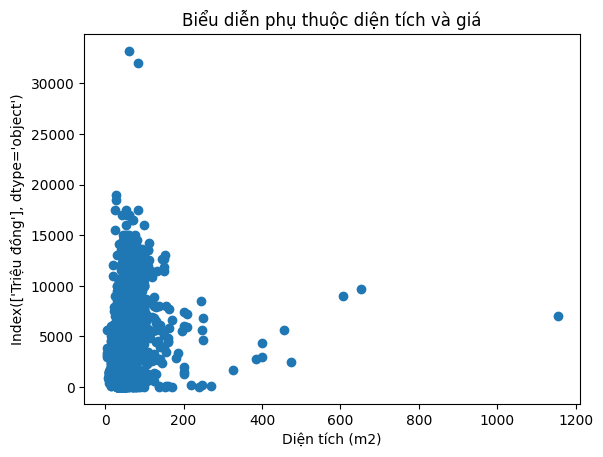

In [19]:
plt.scatter(data['Diện tích'], data[target_name])
plt.xlabel('Diện tích (m2)')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc diện tích và giá')
plt.show()

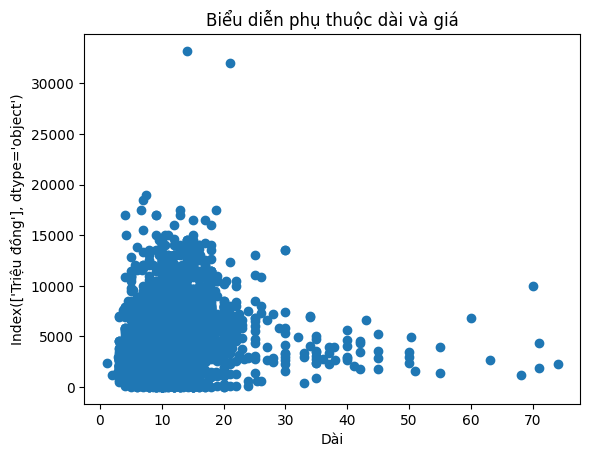

In [20]:
plt.scatter(data['Dài'], data[target_name])
plt.xlabel('Dài')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc dài và giá')
plt.show()

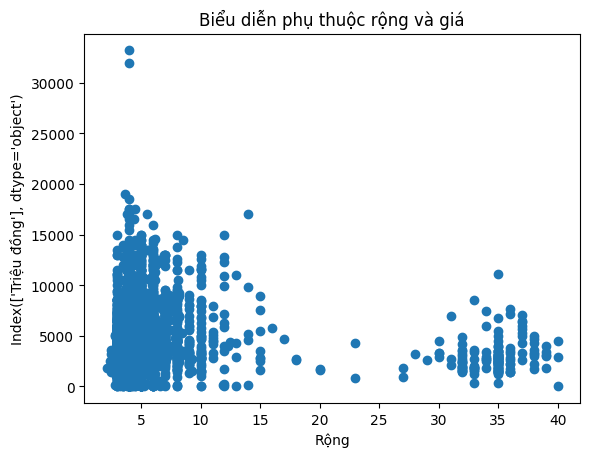

In [21]:
plt.scatter(data['Rộng'], data[target_name])
plt.xlabel('Rộng')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc rộng và giá')
plt.show()

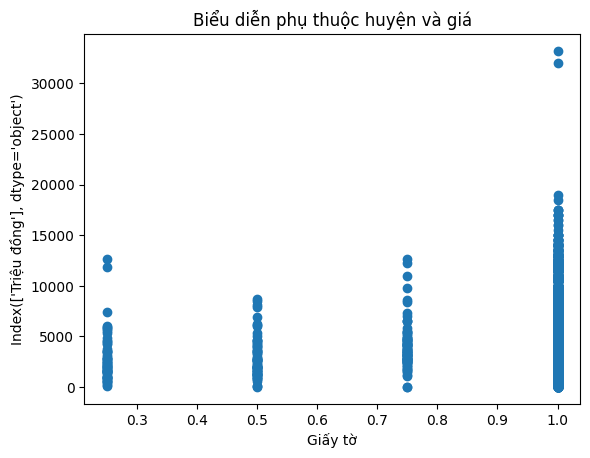

In [22]:
plt.scatter(data['Giấy tờ pháp lý'], data[target_name])
plt.xlabel('Giấy tờ')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc huyện và giá')
plt.show()

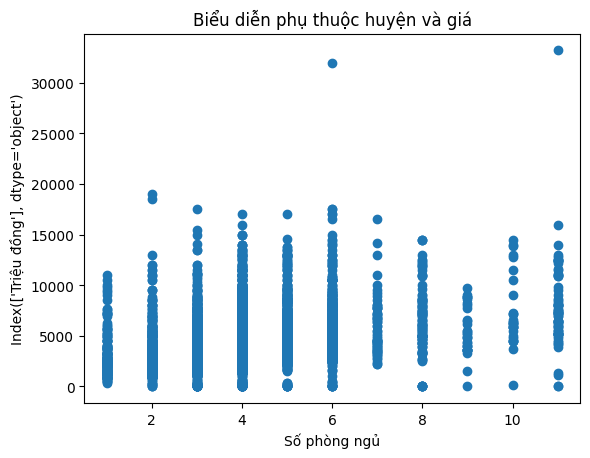

In [23]:
plt.scatter(data['Số phòng ngủ'], data[target_name])
plt.xlabel('Số phòng ngủ')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc huyện và giá')
plt.show()

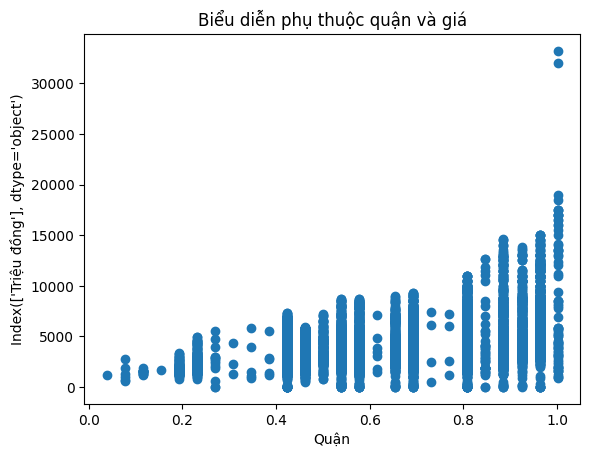

In [24]:
plt.scatter(data['Quận'], data[target_name])
plt.xlabel('Quận')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc quận và giá')
plt.show()

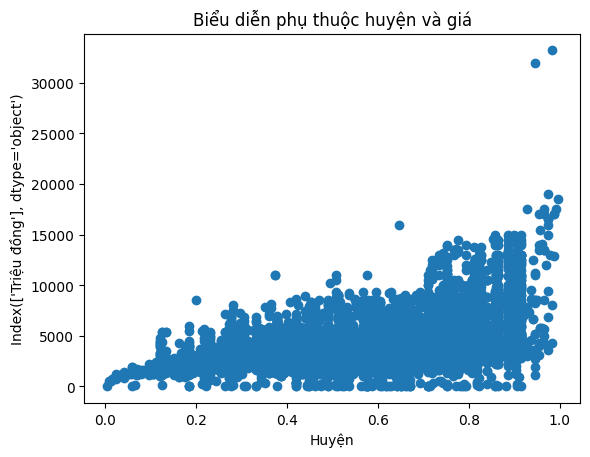

In [25]:
plt.scatter(data['Huyện'], data[target_name])
plt.xlabel('Huyện')
plt.ylabel(target_name)
plt.title('Biểu diễn phụ thuộc huyện và giá')
plt.show()

Bắt đầu train dữ liệu

In [26]:
X = data.drop(target_name, axis=1)
y = data[target_name]
print(X.shape)
print(y.shape)

(10023, 9)
(10023, 1)


Chia tập 80 train 20 test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Các hàm đánh giá

In [28]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lin_reg.intercept_)

[-4544.57256983]


Hệ số của mô hình

In [31]:
lin_reg.coef_

array([[1.44897676e+03, 3.19279842e+03, 3.63445216e+03, 1.54664109e+03,
        1.78404716e+02, 2.71180287e+02, 1.52603376e+01, 5.83831774e+01,
        1.75005607e+00]])

In [32]:
pred = lin_reg.predict(X_test)
print(pred)

[[6394.06266586]
 [3414.49947564]
 [3656.41937028]
 ...
 [3354.36534922]
 [2592.31444247]
 [1594.81190848]]


Kiểm tra xem có giá trị âm không

In [33]:
for x in pred:
    if x <0:
        print(x)

Kiểm tra min max

In [34]:
import math
max=-math.inf
j=-1
for i in range(len(pred)):
    if pred[i]>max:
        max=pred[i]
        j=i
print(max)
print(j)

[11101.16056516]
1117


In [35]:

min=math.inf
j2=-1
for i in range(len(pred)):
    if pred[i]<min:
        min=pred[i]
        j2=i
print(min)
print(j2)

[241.59748159]
577


In [36]:
print(X_test.iloc[j],y_test.iloc[j])

Quận                 0.924
Huyện                0.798
Loại hình nhà ở      1.000
Giấy tờ pháp lý      1.000
Số tầng              4.000
Số phòng ngủ         6.000
Diện tích          200.000
Dài                 20.000
Rộng                10.000
Name: 5395, dtype: float64 Triệu đồng    2000.0
Name: 5395, dtype: float64


nhà có các thuộc tính điểm cao được đánh giá với số tiền cao hơn so thực tế

In [37]:
print(X_test.iloc[j2],y_test.iloc[j2])

Quận                0.231
Huyện               0.084
Loại hình nhà ở     0.250
Giấy tờ pháp lý     1.000
Số tầng             1.000
Số phòng ngủ        1.000
Diện tích          45.000
Dài                10.000
Rộng                4.500
Name: 3071, dtype: float64 Triệu đồng    1380.15
Name: 3071, dtype: float64


Giá nhà dự đoán thấp hơn so với thực tế vì số điểm quận, huyện, diện tích, loại hình, số phòng ngủ đều thấp và chúng có tính ảnh hưởng mạnh tới giá nhà trong mô hình

Text(0, 0.5, 'true')

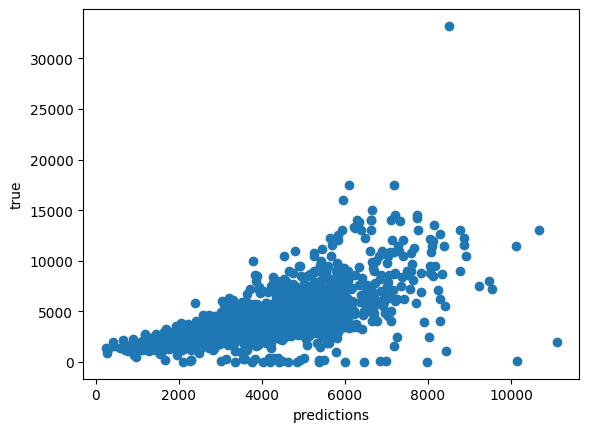

In [38]:
plt.scatter(pred, y_test)
plt.xlabel('predictions')
plt.ylabel('true')

Đánh giá

In [39]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1140.4698976004909
MSE: 3208679.050721436
RMSE: 1791.2786077887035
R2 Square 0.4538014431410481
__________________________________
Train set evaluation:
_____________________________________
MAE: 1093.6424169540649
MSE: 2739884.450882038
RMSE: 1655.2596324691901
R2 Square 0.461469282445196
__________________________________


Lưu mô hình

In [40]:
# lưu model
import pickle
pickle.dump(lin_reg,open('lin_reg_perfect2.pkl','wb'))